# Quick summary of MIND evaluation

This notebook provides a very quick, cursory look at the MIND evaluation
statistics and resource consumption. It is not a full or very serious
evaluation, just intended to give us quick charts.

In [1]:
import pandas as pd
import plotnine as pn
from humanize import metric

In [2]:
subset_metrics = pd.read_csv('../outputs/mind-subset-metrics.csv')
subset_tasks = pd.read_csv('../outputs/mind-subset-tasks.csv')
small_metrics = pd.read_csv('../outputs/mind-small-metrics.csv')
small_tasks = pd.read_csv('../outputs/mind-small-tasks.csv')
val_metrics = pd.read_csv('../outputs/mind-val-metrics.csv')
val_tasks = pd.read_csv('../outputs/mind-val-tasks.csv')

## MIND Small Evaluation

Quick results on the MIND Small runs.

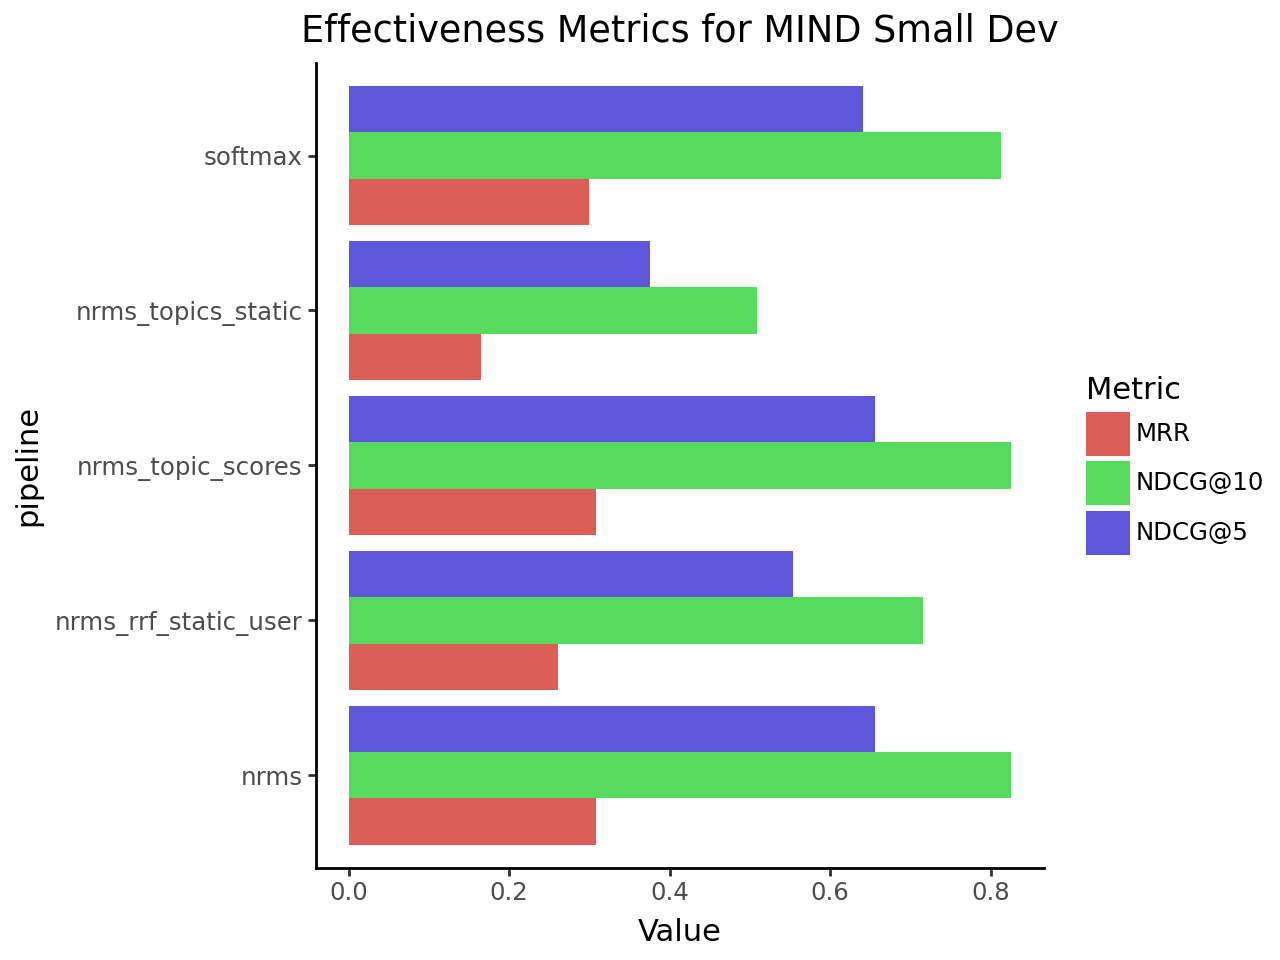

In [3]:
(
    pn.ggplot(small_metrics.melt(id_vars='pipeline', value_vars=['NDCG@10', 'NDCG@5', 'MRR']))
    + pn.aes(x='pipeline', y='value', fill='variable')
    + pn.geom_col(position='dodge')
    + pn.coord_flip()
    + pn.ggtitle('Effectiveness Metrics for MIND Small Dev')
    + pn.labs(fill='Metric', y='Value')
    + pn.theme_classic()
)

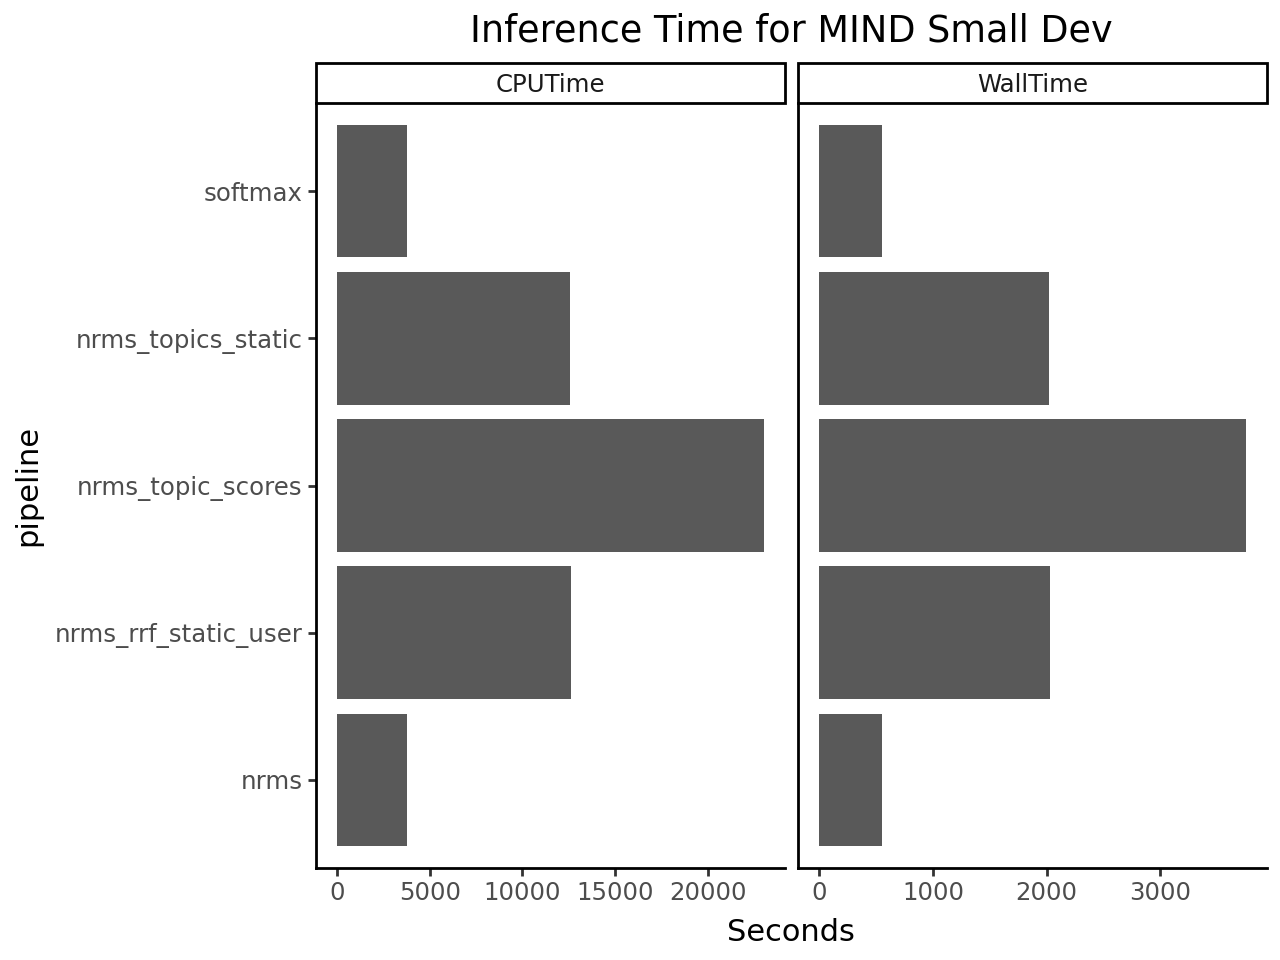

In [4]:
(
    pn.ggplot(small_tasks.melt(id_vars='pipeline', value_vars=['WallTime', 'CPUTime']))
    + pn.aes(x='pipeline', y='value')
    + pn.geom_col()
    + pn.coord_flip()
    + pn.facet_grid(cols='variable', scales='free_x')
    + pn.ggtitle('Inference Time for MIND Small Dev')
    + pn.labs(y='Seconds')
    + pn.theme_classic()
)

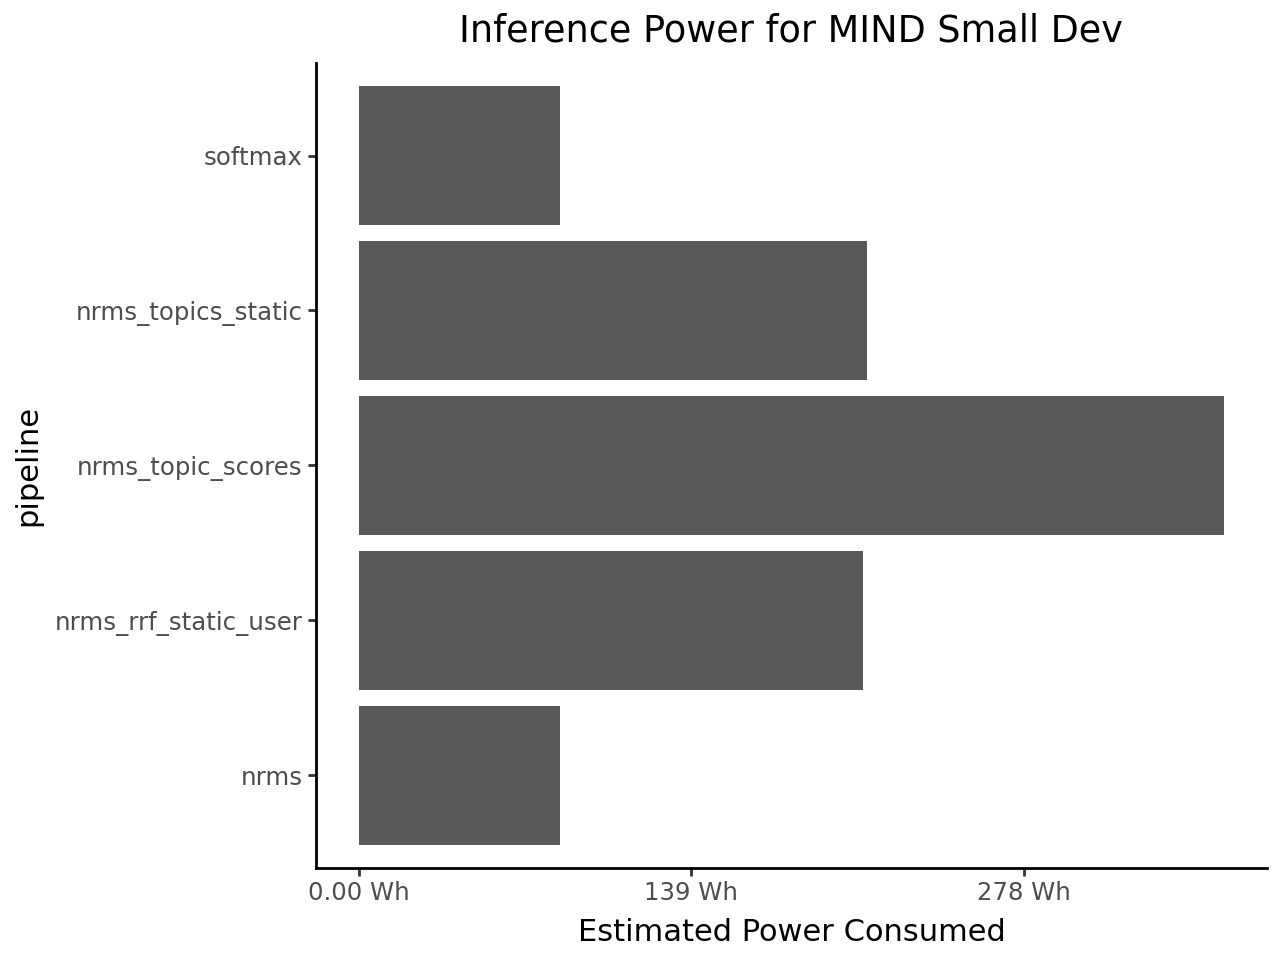

In [5]:
(
    pn.ggplot(small_tasks)
    + pn.aes(x='pipeline', y='Power')
    + pn.geom_col()
    + pn.scale_y_continuous(labels=lambda bps: [metric(x / 3600, 'Wh') for x in bps])
    + pn.coord_flip()
    + pn.ggtitle('Inference Power for MIND Small Dev')
    + pn.labs(y='Estimated Power Consumed')
    + pn.theme_classic()
)

## MIND Large Evaluation

Quick results on the MIND Large runs.

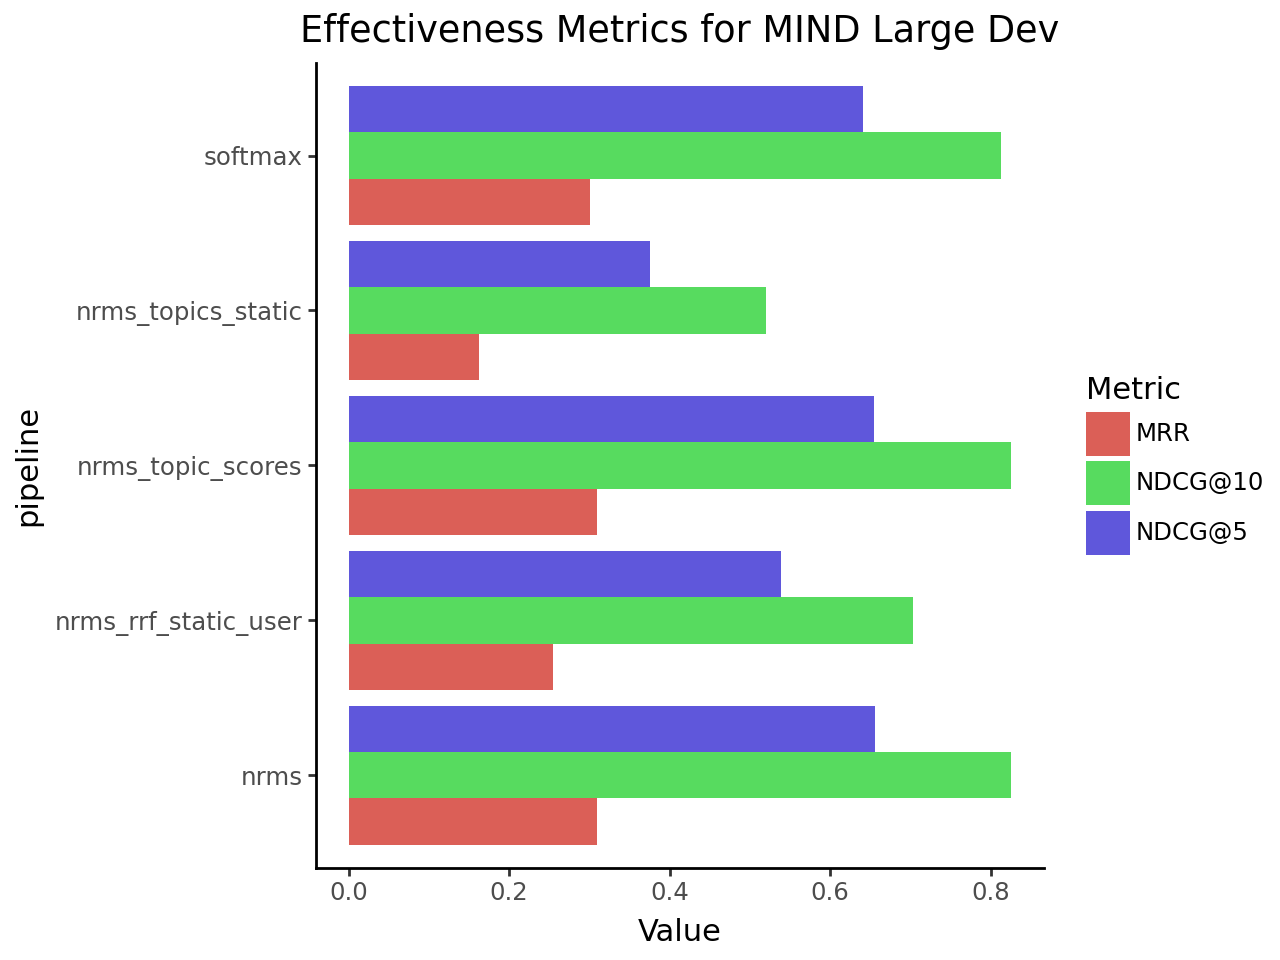

In [6]:
(
    pn.ggplot(val_metrics.melt(id_vars='pipeline', value_vars=['NDCG@10', 'NDCG@5', 'MRR']))
    + pn.aes(x='pipeline', y='value', fill='variable')
    + pn.geom_col(position='dodge')
    + pn.coord_flip()
    + pn.ggtitle('Effectiveness Metrics for MIND Large Dev')
    + pn.labs(fill='Metric', y='Value')
    + pn.theme_classic()
)

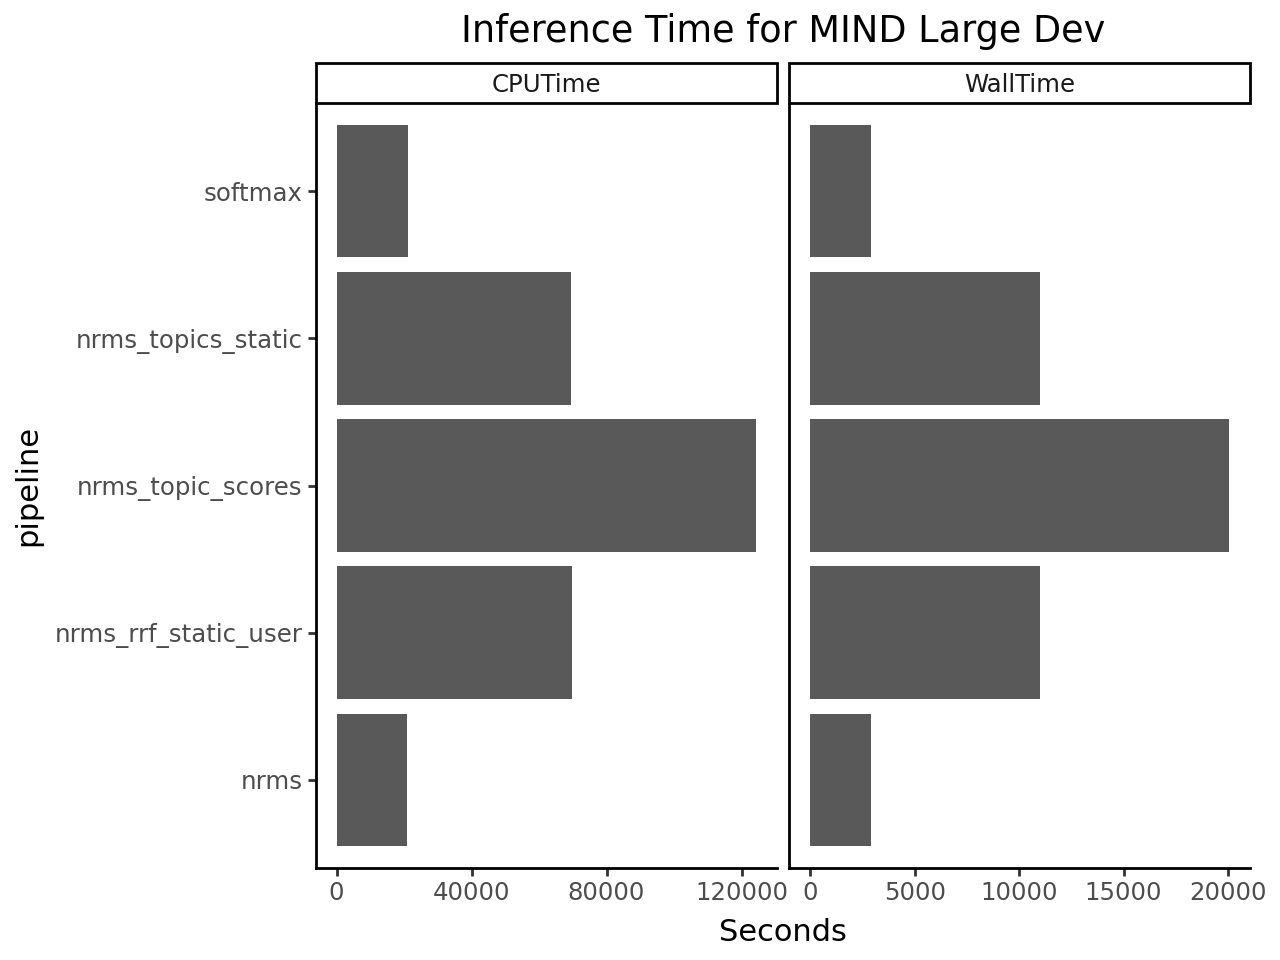

In [7]:
(
    pn.ggplot(val_tasks.melt(id_vars='pipeline', value_vars=['WallTime', 'CPUTime']))
    + pn.aes(x='pipeline', y='value')
    + pn.geom_col()
    + pn.coord_flip()
    + pn.facet_grid(cols='variable', scales='free_x')
    + pn.ggtitle('Inference Time for MIND Large Dev')
    + pn.labs(y='Seconds')
    + pn.theme_classic()
)

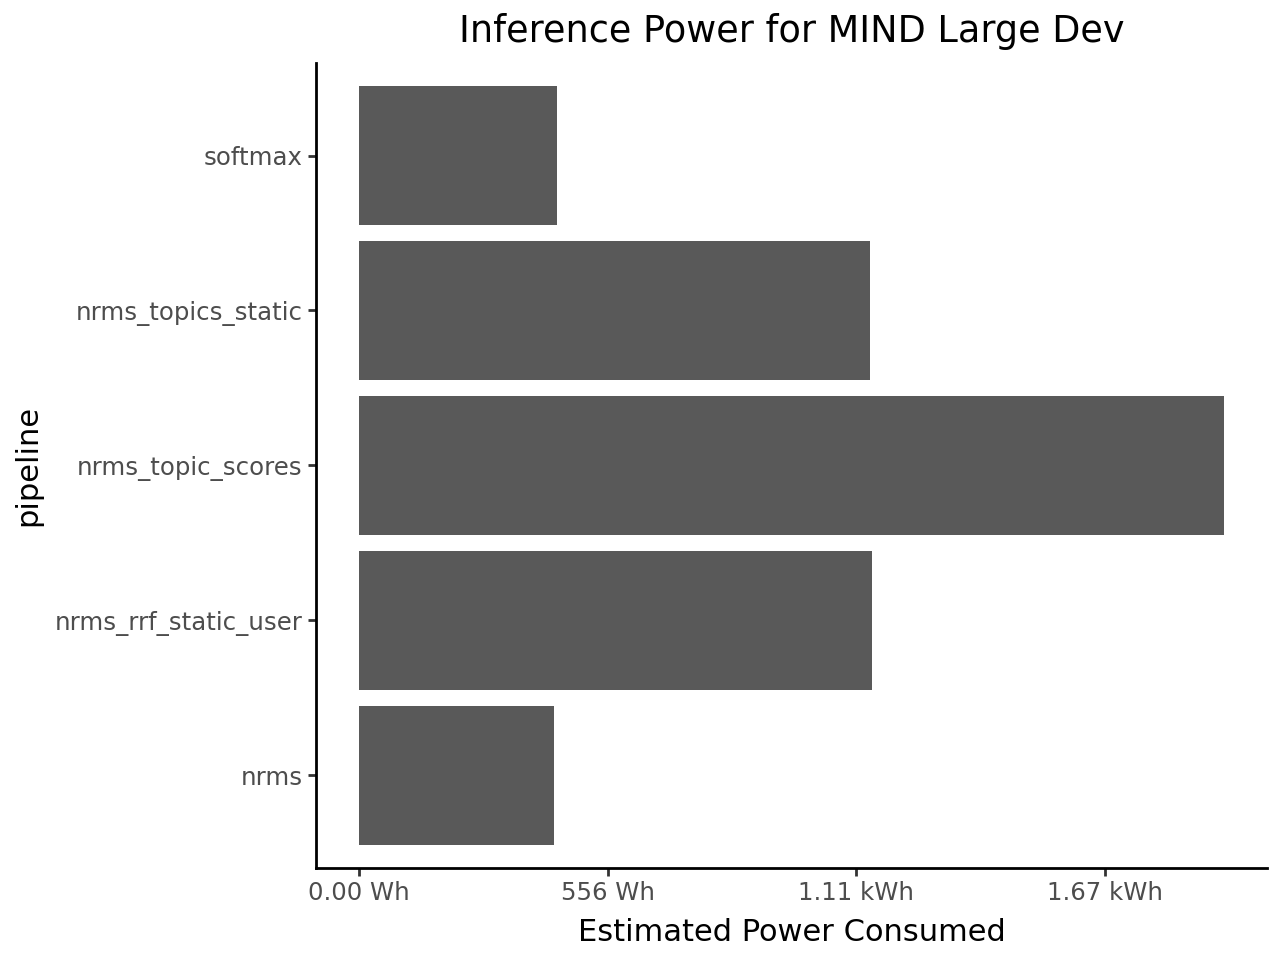

In [8]:
(
    pn.ggplot(val_tasks)
    + pn.aes(x='pipeline', y='Power')
    + pn.geom_col()
    + pn.scale_y_continuous(labels=lambda bps: [metric(x / 3600, 'Wh') for x in bps])
    + pn.coord_flip()
    + pn.ggtitle('Inference Power for MIND Large Dev')
    + pn.labs(y='Estimated Power Consumed')
    + pn.theme_classic()
)